In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("XboxStats.csv")
pd.set_option("display.max_rows", 10)
df

,Game_Name,Minutes_Played,GamerScore_Earned,GamerScore_Possible,Number_of_Achievements
0,League of Legends,0,0,0,0
1,Apex Legends,0,0,0,0
2,Microsoft Flight Simulator,0,0,1000,0
3,Bloodroots,41,160,1000,7
4,The Outer Worlds,53,45,1390,2
...,...,...,...,...,...
117,Disney Magic Kingdoms: Build Your Own Magical ...,0,0,0,0
118,Rayman Legends,0,0,0,0
119,Nuclear Throne,0,0,0,0
120,Monster Hunter: World,0,0,0,0


In [3]:
top_five_games_minutes_played = df.sort_values(by = "Minutes_Played", ascending= False).iloc[0:5]
top_five_games_minutes_played

,Game_Name,Minutes_Played,GamerScore_Earned,GamerScore_Possible,Number_of_Achievements
28,Mass Effect™ Legendary Edition,3182,2005,2915,91
8,Yakuza: Like a Dragon,2279,600,1000,42
12,Red Dead Redemption 2,2076,170,1000,10
59,DRAGON QUEST® XI S: Echoes of an Elusive Age™ ...,1723,340,1000,32
33,FINAL FANTASY X/X-2 HD Remaster,1558,80,1000,8


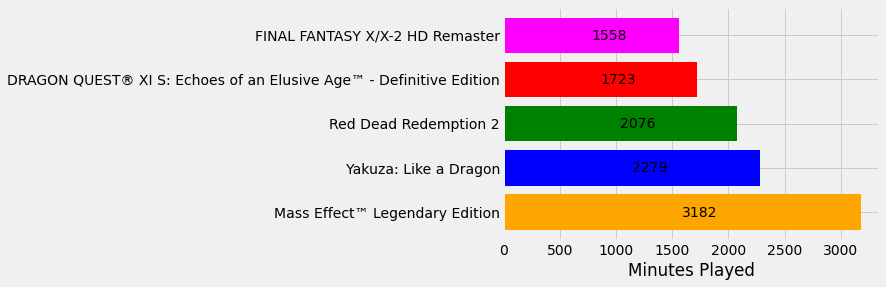

In [27]:
def plot_stats(df, label, xlabel):

    plt.barh(width = df[label], y = df["Game_Name"], color = ["Orange", "Blue",  "Green", "Red", "magenta"])

    plt.xlabel(xlabel)

    for height , GamerScore in enumerate(df[label]):
        plt.text(x = GamerScore / 2, y = height - 0.1, s = str(GamerScore))

plt.rcParams.update({"font.size" : 12, "font.weight" : "medium"})
plt.style.use("fivethirtyeight")

plot_stats(top_five_games_minutes_played, "Minutes_Played", "Minutes Played")

In [5]:
top_five_games_gamerscore = df.sort_values(by = "GamerScore_Earned", ascending = False).head()
top_five_games_gamerscore

,Game_Name,Minutes_Played,GamerScore_Earned,GamerScore_Possible,Number_of_Achievements
28,Mass Effect™ Legendary Edition,3182,2005,2915,91
76,The Touryst,199,600,1000,8
8,Yakuza: Like a Dragon,2279,600,1000,42
62,Immortals Fenyx Rising™,1228,485,1845,26
71,UnderMine,848,475,1000,50


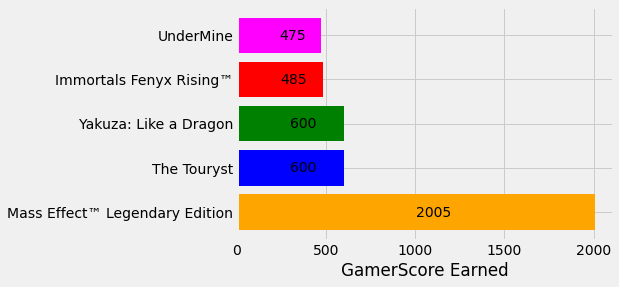

In [24]:


plot_stats(top_five_games_gamerscore,"GamerScore_Earned", "GamerScore Earned")

In [7]:
top_five_games_achievements = df.sort_values(by = "Number_of_Achievements", ascending = False).head()
top_five_games_achievements

,Game_Name,Minutes_Played,GamerScore_Earned,GamerScore_Possible,Number_of_Achievements
28,Mass Effect™ Legendary Edition,3182,2005,2915,91
71,UnderMine,848,475,1000,50
8,Yakuza: Like a Dragon,2279,600,1000,42
59,DRAGON QUEST® XI S: Echoes of an Elusive Age™ ...,1723,340,1000,32
72,Yakuza Kiwami 2,1379,460,1000,30


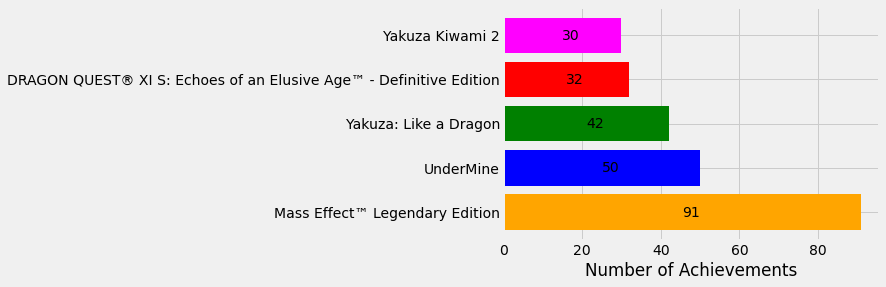

In [28]:
plot_stats(top_five_games_achievements, "Number_of_Achievements" , "Number of Achievements")

In [32]:
most_efficient_minutes_played = df.copy()
most_efficient_minutes_played['GamerScore per Minute'] = (most_efficient_minutes_played["GamerScore_Earned"] / most_efficient_minutes_played["Minutes_Played"]).round(3)

import numpy as np

most_efficient_minutes_played.replace([np.inf, -np.inf], np.nan, inplace = True)
most_efficient_minutes_played.dropna(axis = 0, inplace= True)

most_efficient_minutes_played.sort_values(by = "GamerScore per Minute", ascending= False, inplace= True)
most_efficient_minutes_played = most_efficient_minutes_played.head()
most_efficient_minutes_played

,Game_Name,Minutes_Played,GamerScore_Earned,GamerScore_Possible,Number_of_Achievements,GamerScore per Minute
49,Apex Legends™,33,150,1000,2,4.545
38,Destroy All Humans!,69,300,1000,19,4.348
3,Bloodroots,41,160,1000,7,3.902
26,Human Fall Flat,44,150,2120,8,3.409
86,KINGDOM HEARTS HD 2.8 Final Chapter Prologue,16,50,2000,1,3.125


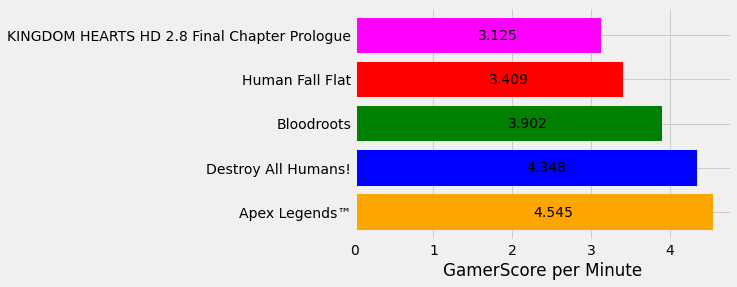

In [33]:
plot_stats(most_efficient_minutes_played, "GamerScore per Minute" , "GamerScore per Minute")